In [2]:
import pandas as pd
file_path = "../data/IMDB Dataset.csv"
df = pd.read_csv(file_path)
print("Dataset loaded successfully into a Pandas DataFrame!")
df.head()

Dataset loaded successfully into a Pandas DataFrame!


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Load the IMDB Dataset
We load the IMDB dataset from a CSV file into a Pandas DataFrame for further analysis and processing.

In [3]:
df.shape

(50000, 2)

### Check Dataset Shape
Display the number of rows and columns in the loaded DataFrame to understand the dataset size.

In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### Check for Missing Values
Identify any missing values in each column of the DataFrame to determine if data cleaning is needed.

In [5]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Sentiment Class Distribution
Count the number of positive and negative reviews to understand the class balance in the dataset.

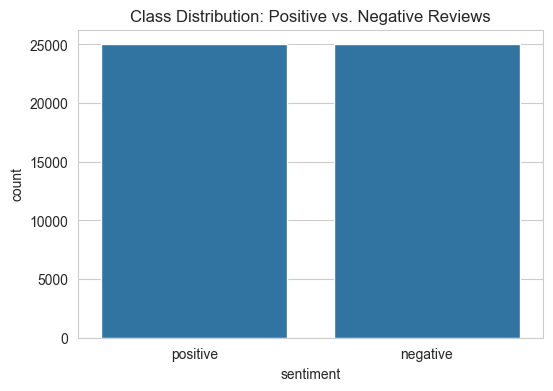

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution: Positive vs. Negative Reviews')
plt.show()

### Visualize Sentiment Class Distribution
Create a bar plot to visualize the distribution of positive and negative reviews in the dataset using Seaborn and Matplotlib.

In [7]:
def to_lower(text):
    return text.lower()

df["review"] = df["review"].apply(to_lower)

df.head()
    

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### Convert Review Text to Lowercase
Convert all review text to lowercase to ensure uniformity and reduce the vocabulary size for text processing.

In [8]:
import re
def remove_tags(text):
    pattern = re.compile(r"<.*?>")
    return pattern.sub("", text)

df["review"] = df["review"].apply(remove_tags)
df["review"].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. the filming tec...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

### Remove HTML Tags from Review Text
Use regular expressions to remove any HTML tags present in the review text, cleaning the data for further processing.

In [9]:
def remove_punctuation(text):
    return re.sub(r"[^a-z0-9\s]", "", text).strip()

df["review"] = df["review"].apply(remove_punctuation)
df["review"].head()


0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

### Remove Punctuation from Review Text
Remove all punctuation from the review text to further clean the data and prepare it for tokenization.

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
english_stopwords_list = stopwords.words('english')
print("--- First 10 Stopwords from NLTK List ---")
print(english_stopwords_list[:10])
print("\n" + "="*50 + "\n")
stop_words_set = set(english_stopwords_list)

print(f"We have successfully loaded {len(stop_words_set)} English stopwords into a highly efficient set.")

--- First 10 Stopwords from NLTK List ---
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


We have successfully loaded 198 English stopwords into a highly efficient set.


In [12]:
def tokenize_and_remove_stopwords(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words_set]
    return " ".join(tokens)

df["review"] = df["review"].apply(tokenize_and_remove_stopwords)
df["review"].head()


0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df["review"] = df["review"].apply(lemmatize_tokens)
df.head()


,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [15]:
X= df["review"]
y = df["sentiment"]
X.head()

0    one reviewer mentioned watching 1 oz episode y...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (40000,)
Shape of X_test: (10000,)
Shape of y_train: (40000,)
Shape of y_test: (10000,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
print(tfidf_vectorizer)

TfidfVectorizer(max_features=10000)


In [19]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
print(X_train_tfidf.shape)
import joblib
print(tfidf_vectorizer)
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

(40000, 10000)
TfidfVectorizer(max_features=10000)


['tfidf_vectorizer.pkl']

### TF-IDF Vectorization and Saving the Vectorizer
We use `TfidfVectorizer` from scikit-learn to convert the text data into numerical features suitable for machine learning models. After fitting the vectorizer on the training data, we save it using `joblib` so it can be reused later for transforming new data or for deployment.

In [20]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(X_test_tfidf.shape)


(10000, 10000)


In [21]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
print(lr_model)

LogisticRegression(random_state=42)


In [22]:
lr_model.fit(X_train_tfidf, y_train)
print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [23]:
y_pred = lr_model.predict(X_test_tfidf)
print("First 20 predictions made by the model:")
print(y_pred[:20])

First 20 predictions made by the model:
['negative' 'positive' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'positive'
 'positive' 'negative' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive']


In [24]:
print("\n" + "="*50 + "\n")
print("Comparison of first 5 Predictions vs. Actual Labels:")
print("Predictions:", y_pred[:5])
print("Actuals:    ", y_test.values[:5])



Comparison of first 5 Predictions vs. Actual Labels:
Predictions: ['negative' 'positive' 'positive' 'negative' 'negative']
Actuals:     ['negative' 'negative' 'positive' 'negative' 'negative']


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



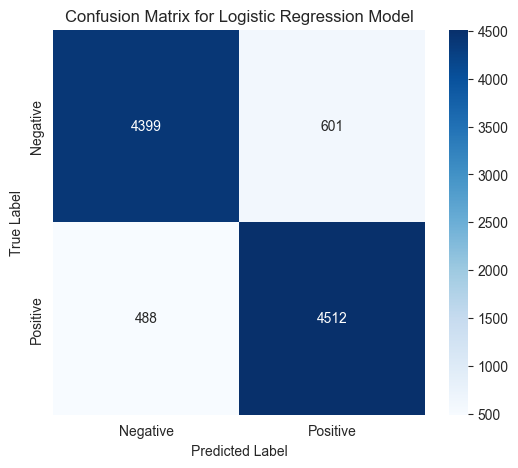

In [26]:
from sklearn.metrics import confusion_matrix

class_names = ['Negative', 'Positive']
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')

# Display the plot.
plt.show()

In [27]:
import joblib
joblib.dump(lr_model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [28]:
# To begin our new text preprocessing pipeline for the deep learning model,
# we need the primary tool for converting text into integer sequences.
# The Tokenizer class from Keras is designed for this exact purpose.
# It lives within the 'tensorflow.keras.preprocessing.text' module.
# tensorflow: The main deep learning library.
# keras: The high-level, user-friendly API for building models in TensorFlow.
# preprocessing: A module containing data preparation utilities.
# text: The sub-module with tools specifically for text data.
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

In [29]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
#print("Tokenizer fitted on training data!", tokenizer.word_index)
print("Total unique words in the training set:", len(tokenizer.word_index))
print(tokenizer.word_index.get("movie"))

Total unique words in the training set: 181443
2


In [30]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
print("--- Original Text Review (from X_train) ---")
print(X_train.iloc[0])
print("\n--- Same Review Converted to an Integer Sequence ---")
print(X_train_sequences[0])

--- Original Text Review (from X_train) ---
caught little gem totally accident back 1980 81 revival theatre see two old silly scifi movie theatre packed full warning showed bunch scifi short spoof get u mood somewhat amusing came within second audience hysteric biggest laugh came showed princess laia huge cinnamon bun instead hair head look camera give grim smile nod made even funnier gotta see chewabacca played look like muppet extremely silly stupidbut couldnt stop laughing dialogue drowned laughter also know star war pretty well even funnierthey deliberately poke fun dialogue really work audience definite 10

--- Same Review Converted to an Integer Sequence ---
[903, 46, 1144, 346, 1409, 62, 4002, 1, 7743, 1312, 13, 38, 83, 551, 777, 2, 1312, 3052, 278, 1570, 1075, 617, 777, 224, 1941, 9, 79, 1038, 532, 1003, 273, 630, 203, 164, 1, 951, 220, 273, 1075, 2441, 1, 509, 1, 1, 207, 1004, 260, 43, 256, 59, 2992, 1437, 3662, 28, 10, 2509, 2955, 13, 1, 163, 43, 5, 4136, 461, 551, 1, 308, 42

In [31]:
MAX_LEN = 200

X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
print("--- Shape of Padded Data ---")
print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of X_test_padded:", X_test_padded.shape)

--- Shape of Padded Data ---
Shape of X_train_padded: (40000, 200)
Shape of X_test_padded: (10000, 200)


In [32]:
label_mapping = {'positive': 1, 'negative': 0}
y_train_final = y_train.map(label_mapping)
y_test_final = y_test.map(label_mapping)

y_train_final.head()

47808    1
20154    0
43069    0
19413    0
13673    0
Name: sentiment, dtype: int64

In [33]:
embedding_dim = 128
lstm_units = 64
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=MAX_LEN))
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

c:\Users\Lenovo\project\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
EPOCHS = 5
BATCH_SIZE = 64
model.fit(X_train_padded, y_train_final, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test_padded, y_test_final))


Epoch 1/5
 87/625 ━━━━━━━━━━━━━━━━━━━━ 1:27 162ms/step - accuracy: 0.4989 - loss: 0.6941

KeyboardInterrupt: 

Keys available in history object: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


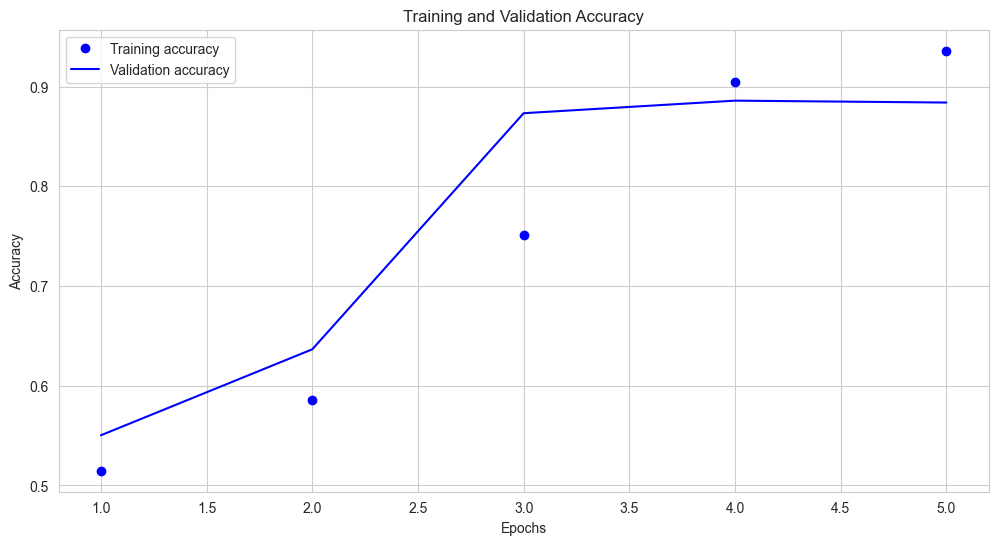

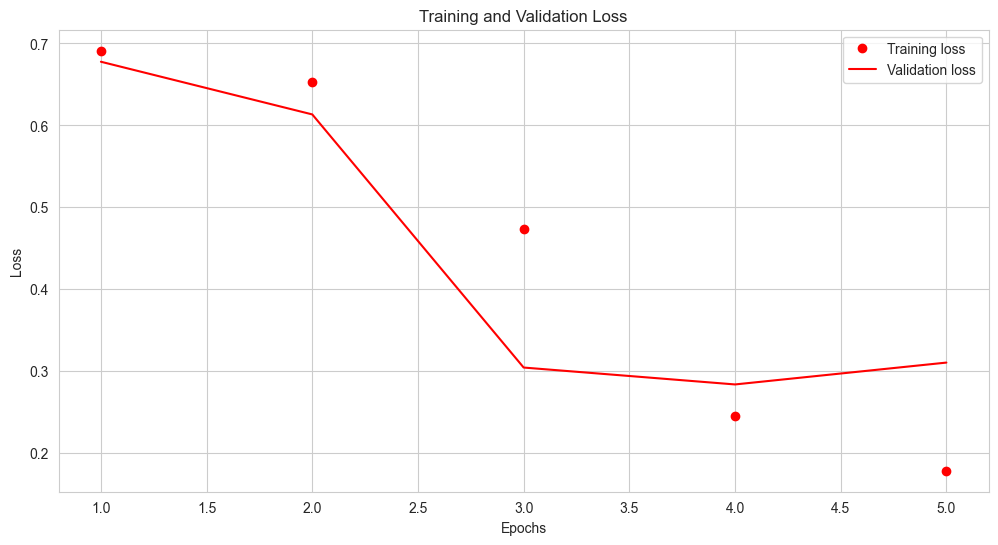

In [ ]:
# We will use matplotlib to create our plots.
import matplotlib.pyplot as plt

# The 'history' object returned by model.fit() contains a dictionary
# holding the loss and accuracy values for both training and validation.
history_dict = model.history.history  # Access the .history attribute of the History object
print("Keys available in history object:", history_dict.keys())

# Let's extract the metrics from the history dictionary.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# We need a range of numbers for the x-axis, which will represent the epochs.
# The number of epochs is simply the length of our accuracy/loss lists.
epochs = range(1, len(acc) + 1)

# --- Plot 1: Training and Validation Accuracy ---

# plt.figure() creates a new figure for plotting. figsize sets the width and height.
plt.figure(figsize=(12, 6))
# 'bo' creates a blue dot for each data point.
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# 'b' creates a solid blue line.
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.legend() displays the legend with the labels we provided.
plt.legend()
# plt.show() displays the plot.
plt.show()

# --- Plot 2: Training and Validation Loss ---

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# The model.evaluate() method computes the loss and metrics for the given data.
# It's the standard way to get the final performance score on your test set.
# We pass it the padded test features and the final numerical test labels.
# The 'verbose=2' argument just makes the output a little cleaner.
final_loss, final_accuracy = model.evaluate(X_test_padded, y_test_final, verbose=2)

# Let's print the results in a nicely formatted way.
print(f"\\nFinal LSTM Model Performance on Test Data:")
print(f"Loss: {final_loss:.4f}")
print(f"Accuracy: {final_accuracy:.4f} ({(final_accuracy * 100):.2f}%)")

313/313 - 6s - 19ms/step - accuracy: 0.8840 - loss: 0.3105
\nFinal LSTM Model Performance on Test Data:
Loss: 0.3105
Accuracy: 0.8840 (88.40%)


In [ ]:
# 1. Get the raw probability predictions from the model.
# The output will be a 2D array of shape (10000, 1).
y_pred_probs = model.predict(X_test_padded)

# 2. Convert probabilities to binary class labels (0 or 1).
# We use a simple list comprehension with a 0.5 threshold.
# The .flatten() method converts the (10000, 1) array into a 1D array of shape (10000,).
y_pred_lstm = [1 if prob > 0.5 else 0 for prob in y_pred_probs.flatten()]

# Now y_pred_lstm is a list of 0s and 1s, just like our y_test_final.
# We can now use the same Scikit-learn tools we used for our baseline!

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


\n--- LSTM Model Classification Report ---
              precision    recall  f1-score   support

    Negative       0.88      0.89      0.88      5000
    Positive       0.89      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

\n--- LSTM Model Confusion Matrix ---


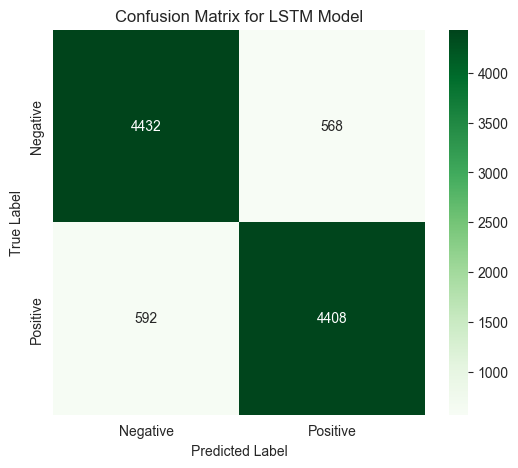

In [ ]:
# We'll use the same functions we imported much earlier.
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# --- Classification Report ---
print("\\n--- LSTM Model Classification Report ---")
print(classification_report(y_test_final, y_pred_lstm, target_names=['Negative', 'Positive']))

# --- Confusion Matrix ---
print("\\n--- LSTM Model Confusion Matrix ---")
cm_lstm = confusion_matrix(y_test_final, y_pred_lstm)
class_names = ['Negative', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LSTM Model')
plt.show()